In [35]:
from IPython.display import HTML
HTML('''
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.
js"></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Click here to toggle on/off the raw code."></form>
''')

In [36]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<center>
    <img src="banner.png" width='100%' height='100%'>
</center>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">Executive Summary</h1>

The `OpenAlex Authors` dataset is a crucial resource for gaining insights into scholarly publishing, enabling evidence-based decision-making and innovation in the academic community. In this project, we leveraged big data analytics to analyze the dataset and obtain valuable insights into the impact of authors, their affiliations, research concepts, publication count, citation patterns, and geographic distribution.

Part of our methodology involved loading the data into `Spark`, optimizing performance by converting the files to the most efficient `Parquet` file format. We then conducted exploratory data analysis and query building to a subset of the dataset before performing an extraction of the full dataset (left overnight, amounting to `4-6 hours`). The extracted `Parquet` [1] files were converted into `Pandas dataframes` and saved as `CSV`. Using `Matplotlib`, we generated reports highlighting the contributions of authors to the general research field and their respective domains, including the number of published works, citations, concepts, and affiliations.

Our analysis revealed **<span style='background:#dcf7f3'>a significant increase in registered published works (and associated citations) during the pandemic, unsurprisingly with a focus on COVID-19 research</span>**. The **<span style='background:#dcf7f3'>United States and China lead the countries in academic research</span>**, with their prominent institutions housing the most published and cited authors. **<span style='background:#dcf7f3'>Biology, medicine, physics, and chemistry are the most notable disciplines of research</span>**, with the liberal arts bringing up the rear. However, while computer science is also one of the more prominent disciplines, **<span style='background:#dcf7f3'>data science-related works only comprise less than 1% of the total publications</span>**.

A challenge in the dataset is the presence of duplicate author names and database accounts and usernames, limiting the accuracy of the analysis. Nevertheless, our study provides ample valuble insights into the scholarly publishing landscape, facilitating a deeper understanding of research trends and the impact of authors, their affiliations, and their respective disciplines, informing evidence-based decision-making and supporting innovation in the academic community.

---

<div>
    <p style="font-size:10px;font-style:default;">
        <b>List of Figures</b><br>
        <b>Figure 1.</b> OpenAlex Authors Dataset Size.<br>
        <b>Figure 2.</b> OpenAlex Authors Schema.<br>
        <b>Figure 3.</b> Lab 1 Methodology.<br>
        <b>Figure 4.</b> Number of Registered Publications from 2012 to 2022.<br>
        <b>Figure 5.</b> Number of Registered Citations from 2012 to 2022.<br>
        <b>Figure 6.</b> Top 10 Authors with the Most Number of Work Publications.<br>
        <b>Figure 7.</b> Top 10 Authors with the Most Work Citations.<br>
        <b>Figure 8.</b> Number of Social Media and Repository Accounts.<br>
        <b>Figure 9.</b> Top 10 Countries Associated with the Most Work Publications.<br>
        <b>Figure 10.</b> Published Works-Country Density.<br>
        <b>Figure 11.</b> Top 10 Countries Associated with the Most Work Citations.<br>
        <b>Figure 12.</b> Citations-Country Density.<br>
        <b>Figure 13.</b> Top 10 Institutions with the Most Number of Publications and Citations.<br>
        <b>Figure 14.</b> Top 10 Institutions with the Most Number of Publications.<br>
        <b>Figure 15.</b> Top 10 Institutions with the Most Number of Citations.<br>
        <b>Figure 16.</b> Top 10 Disciplines with the Most Combined Number of Publications and Citations.<br>
        <b>Figure 17.</b> Top Institutions on COVID-19 Research.<br>
        <b>Figure 18.</b> Data Science-Related Publications and Citations.<br>
    </p>
</div>
<br>
<div>
    <p style="font-size:10px;font-style:default;">
        <b>List of Tables</b><br>
        <b>Table 1.</b> OpenAlex Authors Features and Descriptions.<br>
        <b>Table 2.</b> OpenAlex Authors Dataset.<br>
        <b>Table 3.</b> OpenAlex Authors Dataset Description.<br>
    </p>
</div>

<div style="background-color:#3e363f; color:#FFFFFF; padding: 1px;"> </div>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">Problem Statement</h1>

The `OpenAlex Authors` dataset provides a rich source of information for understanding the scholarly publishing landscape and, in the grander scheme of things, the academic research field. With the continuous growth of data across different fields, the challenge now lies in <b><span style='background:#dcf7f3'>identifying the key areas of research and where most of the contributions are coming from</span></b>. To address this, we aim to answer the following questions by using a descriptive analytics of the `OpenAlex Authors` dataset:

*1. Which are the key areas of research and where is the majority of the contribution coming from based on the authors dataset?*<br>
*2. What are the trends over time in the number of published works and citations?*<br>
*3. Who are the most prolific authors in terms of published works and citations, and which countries and disciplines are they mostly associated with?*<br>
*4. Which countries and institutions have the most published and cited works by their authors?*<br>
*5. The most published and cited works are under which concepts and/or disciplines?*<br>

Answering these questions through descriptive analytics shall provide valuable insights into the impact of authors, their affiliations, and their respective disciplines to the scholarly publishing landscape and the academic research field.

<div style="background-color:#3e363f; color:#FFFFFF; padding: 1px;"> </div>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">Motivation</h1>

Publications and citations are embedded in the life of an academic researcher, regardless of area of expertise. Through the number of publications, these researchers are being monitored and judged by their peers to validate and support claims, or challenge their scientific hypotheses or philosophical takes. On the other hand, the number of citations seems to be the degree to which these researchers are judged, and how competent, reliable, and relevant they and their ideas are.

> *"The importance of journals in academic life goes beyond providing a means of communication and a permanent record. Journal articles are the final output of most research, and a researcher’s performance and productivity are judged largely on the number of publications as well as where they appear. Journals have become deeply embedded in academic infrastructure. They are central to career paths, including both funding and appointments. Author surveys confirm that ‘furthering my career’ and ‘future funding’ are important motivations in publishing their work."* [2]

Understanding the landscape of today's scholarly publishing landscape and the academic research field is essential in identifying key trends in the academe, prioritize research areas to which new researchers may explore, and allocate resources effectively for the prolific ones. By analyzing the OpenAlex Authors dataset, we aim to gain insights in identifying such key areas of research which are both trending and lagging. **<span style='background:#dcf7f3'>This information can help researchers, funding entities, institutions, and even policymakers make informed decisions and strategies regarding research priorities, collaborations, and investments, ultimately leading to more impactful and relevant researches and outputs.</span>**

<div style="background-color:#3e363f; color:#FFFFFF; padding: 1px;"> </div>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">Data Source and Exploration</h1>

`OpenAlex`, named after the ancient <i>Library of Alexandria</i> in Egypt, is an open database of papers, authors, and institutions, among others [3]. It is a crowdsourced collection of metadata on academic research publications, which include information such as publication year, authors, affiliations, and citations. An overview of content is also included in the information through abstracts and keywords. The dataset is collected and compiled from several sources such as <i>Microsoft Academic Graph</i> or MAG, and covers a broad range of academic disciplines (e.g., natural sciences, humanities, etc).

The `OpenAlex` dataset is also a description of scholarly entities and the connection of these entities from one another. Upon exploration, we found five types of dataset inside the repository, namely `Works`, `Authors`, `Venues`, `Institutions`, and `Concepts` [4] . For this study, we decided to focus on the `Authors` dataset, zeroing in on the people who create the Works (e.g., papers, books, articles, etc). Since the `OpenAlex` dataset is a relational database [3], any of the five types can be chosen and can still work through the key research questions for this study.

The `OpenAlex Authors` dataset is `76GB` in size, hence, the use of big data analytics to provide insights to the our key study question of identifying trending and lagging key areas of academic research.

<center><img src="du-sch.jpg" width="50%" height="50%"></center>

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 1. OpenAlex Authors Dataset Size.</b><br>
        <i>Qualifying the size of OpenAlex Authors Dataset as big data.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Data Description</i></span>

The `OpenAlex Authors` dataset used in this project is extracted from the Jojie public dataset given the path `/mnt/data/public/openalex/data/authors`. The dataset is in `JSON` format compressed in `gz`, which has `253,779,827` rows of data. Full description of the fields from the `OpenAlex` API can be found in https://docs.openalex.org/api-entities/authors. [5]

<center><img src="data_description.png" width="35%" height="35%"></center>

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 2. OpenAlex Authors Schema.</b><br>
        <i>Showing schema and descriptions of OpenAlex Authors dataset.</i>
    </p>
</div>

---

| Feature | Type | Description |
| --: | :--: | :-- |
| `cited_by_count` | integer | total number of `Works` that cite an author's work
| `counts_by_year` | list | how many works an author published, and how many times the got cited (older than ten years old are not included)
| `created_date` | string | the data the author was created in the `OpenAlex` dataset
| `display_name` | string | the name of the author as a single string
| `display_name_alternatives` | list | other ways that the author names are displayed
| `id` | string | `OpenAlex` ID for the author
| `ids` | object | all external identifiers of the author
| `last_known_institution` | object | the last known institution associated with the author
| `orcid` | string | Open Researcher and Contributor ID of the author
| `summary_stats` | object | citation metrics for the author
| `updated_date` | string | the last time anything in the author's object changed
| `works_api_url` | string | a URL that will get a list of all the author's works
| `works_count` | integer | the number of `Works` the author has created
| `x_concepts` | list | the concepts most frequently applied to `Works` created by the author (an experimental feature)

<br>
<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Table 1. OpenAlex Authors Features and Descriptions.</b><br>
        <i>Summary of the project dataset description.</i>
    </p>
</div>

Table 3 provides the brief description of each feature of the `OpenAlex Authors` dataset such as `cited_by_count`, `works_count`, and `display_name`, all referred from its API documentation [6]. As an experimental feature, which is subject to removal by the `OpenAlex` should they decide to, `x_concepts` is not included in the succeeding analysis for this study.

<span style="color:#f26419; font-size:18px"><i>Data Limitation</i></span>

According to the `OpenAlex` FAQ (https://docs.openalex.org/additional-help/faq), handling duplicate authors is not yet implemented, and some authors have been deleted from the database [7]. Although, `ORCID` is supposed to ensure unique author identification, it is not strictly enforced in the platform. `xconcepts` is not yet considered for this project as well as it is in the experimentation stage; hence, only the qualitative factor is included in the citation impact, subsequently excluding the quantitative factor (e.g., `score`).

<div style="background-color:#3e363f; color:#FFFFFF; padding: 1px;"> </div>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">Methodology</h1>

<center><img src="method.png" width="75%" height="75%"></center>

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 3. Lab 1 Methodology.</b><br>
        <i>Steps followed for the OpenAlex Authors dataset descriptive analytics.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>File Loading and Initial Analysis</i></span>

To start our analysis, we used `Spark`'s big data processing capabilities to load a subset of files in gzipped `JSON` format. We carefully examined the data structure and determined the most efficient method for parsing (e.g., considering columns as store lists which require additional process to load and extract). Part of our analysis as well was converting the files to the `Parquet` format, which provided, as compared to the original file format, significant improvements in both query execution and data loading processes.

<span style="color:#f26419; font-size:18px"><i>File Conversion</i></span>

Based on our findings from the the initial analysis, we fully converted all the gzipped files, totaling to `76GB`, to the `Parquet` file format. The loading process took approximately `one hour and 15 minutes`, while the conversion to `Parquet` took around `two hours and 30 minutes`. No specific column for partitioning purposes was utilized since the queries were distributed across the dataset.

<span style="color:#f26419; font-size:18px"><i>Subset EDA & Query Building</i></span>

We performance an exploratory data analysis by loading a subset of the `Parquet` file, enabling faster query execution and validation of insights. This facilitated the preparation of `Spark Dataframe` queries and created a prototype for the subsequent steps in generating the Descriptive Analytics Report for the full dataset.

<span style="color:#f26419; font-size:18px"><i>Data Extraction</i></span>

All queries were executed on the full dataset, with an estimated total runtime of `four to six hours` for extracton. The query results were converted from `Spark Dataframe` to `Pandas`, and then saved as `CSV` files, while maintaining the file format as `Parquet`. The files are located in the `processed_full` folder, which allows reviewers of the notebook to run it without the need to process the entire dataset.

A separate notebook `open_alex_spark_extractor.ipynb` for the `Spark` scripts and queries, and extraction, is included in this project which may be a reference for those interested in running the full processing. `Pickle` files are also used for the dictionary of countries used for the geo-spatial visualization in the descriptive analytics.

<span style="color:#f26419; font-size:18px"><i>Post-Extraction EDA</i></span>

The extracted files that were loaded into `Pandas` were analyzed, validating if these met the expected output from the base queries. Several iterations were done on some of the queries, iterating through subset EDA, query building, and data extraction, which took a few days of testing to finalize the data.

<span style="color:#f26419; font-size:18px"><i>Report Generation & Conclusion</i></span>

The Descriptive Analytics Reports were created using `Matplotlib`, taking advantage of the face that the data now fits in memory. The findings and conclusions for each report are also documented in the rest of the notebook.

<div style="background-color:#3e363f; color:#FFFFFF; padding: 1px;"> </div>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">Results and Discussion</h1>

This section includes the exploratory data analysis and descriptive analytics report, providing interpretation and insights on the `OpenAlex Authors` dataset.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pickle

Tables 2 and 3 provide an overview of the `OpenAlex` dataset. Table 2 is the preprocessed dataframe of the dataset from its API. Table 3 is the summary of numerical data within the dataset, such as `cited_by_count` and `works_count`, which will be critical to the succeeding analysis and report for this study.

In [38]:
dataset = pd.read_csv('samples.csv')
dataset

,cited_by_count,counts_by_year,created_date,display_name,display_name_alternatives,id,ids,last_known_institution,most_cited_work,orcid,updated_date,works_api_url,works_count,x_concepts
0,0,[],2017-06-30,compositeur . Compositeur,[],https://openalex.org/A2633105175,"Row(mag=2633105175, openalex='https://openalex...",NaN,Girondine : valse lente [pour piano] : op. 37 ...,NaN,2022-08-31T14:08:53.420550,https://api.openalex.org/works?filter=author.i...,1,"[Row(display_name='Humanities', id='https://op..."
1,0,[],2017-06-30,S Sher,[],https://openalex.org/A2636400655,"Row(mag=2636400655, openalex='https://openalex...",NaN,Nematodes and bacteria on rose: Root-lesion ne...,NaN,2022-08-31T14:08:53.425739,https://api.openalex.org/works?filter=author.i...,1,"[Row(display_name='Geometry', id='https://open..."
2,0,"[Row(cited_by_count=0, works_count=1, year=2016)]",2017-06-30,Владислав Яценко,[],https://openalex.org/A2636811276,"Row(mag=2636811276, openalex='https://openalex...",NaN,"История Украины by Игорь Данилевский, Татьяна ...",NaN,2022-08-31T14:08:53.427935,https://api.openalex.org/works?filter=author.i...,1,"[Row(display_name='Computer science', id='http..."
3,0,[],2017-06-30,Mícheál Briody,[],https://openalex.org/A2637226189,"Row(mag=2637226189, openalex='https://openalex...","Row(country_code='GB', display_name='Language ...",La mission de Séamus Ó Duilearga : sauvegarder...,NaN,2022-08-31T14:08:53.432468,https://api.openalex.org/works?filter=author.i...,1,"[Row(display_name='Ethnology', id='https://ope..."
4,2,"[Row(cited_by_count=1, works_count=0, year=201...",2017-06-30,Francisco Caudet Roca,[],https://openalex.org/A2638532457,"Row(mag=2638532457, openalex='https://openalex...",NaN,El Mono Azul y el romancero de la guerra civil...,NaN,2022-08-31T14:08:53.435542,https://api.openalex.org/works?filter=author.i...,1,"[Row(display_name='Humanities', id='https://op..."
5,0,[],2017-06-30,本道 佐々木,[],https://openalex.org/A2639591104,"Row(mag=2639591104, openalex='https://openalex...",NaN,"A-2Barr bodyによる子宮癌の新スクリーニング法(婦人科その(1), 第17回日本臨...",NaN,2022-08-31T14:08:53.436849,https://api.openalex.org/works?filter=author.i...,1,[]
6,0,[],2017-06-30,隆 重松,[],https://openalex.org/A2640222087,"Row(mag=2640222087, openalex='https://openalex...",NaN,副甲状腺ホルモン(PTH)測定法の進歩と問題点および今後の課題 : 第47回日本透析医学会シ...,NaN,2022-08-31T14:08:53.438464,https://api.openalex.org/works?filter=author.i...,3,"[Row(display_name='Computer science', id='http..."
7,0,[],2017-06-30,Boucher de Perthes,[],https://openalex.org/A2640373672,"Row(mag=2640373672, openalex='https://openalex...",NaN,Lettre de Jacques Boucher de Crèvecoeur de Per...,NaN,2022-08-31T14:08:53.440648,https://api.openalex.org/works?filter=author.i...,1,"[Row(display_name='Humanities', id='https://op..."
8,0,[],2017-06-30,Córdova Fa,[],https://openalex.org/A2640459586,"Row(mag=2640459586, openalex='https://openalex...",NaN,Rupture of the interventricular septum after a...,NaN,2022-08-31T14:08:53.444611,https://api.openalex.org/works?filter=author.i...,1,"[Row(display_name='Psychology', id='https://op..."
9,0,[],2017-06-30,박길준,[],https://openalex.org/A2641026821,"Row(mag=2641026821, openalex='https://openalex...",NaN,상추에서의 싸리수염진딧물(Aulacorthum solani)의 발육과 발육모형 (2...,NaN,2022-08-31T14:08:53.449805,https://api.openalex.org/works?filter=author.i...,2,"[Row(display_name='Psychology', id='https://op..."


<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Table 2. OpenAlex Authors Dataset.</b><br>
        <i>An overview of one of the five types of OpenAlex dataset.</i>
    </p>
</div>

---

In [39]:
datades = pd.read_csv('desc.csv')
datades

,summary,cited_by_count,created_date,display_name,id,most_cited_work,orcid,updated_date,works_api_url,works_count
0,count,2.537798e+08,253779827,253568630,253779827,213480810,4493049,253779827,253779827,2.537798e+08
1,mean,3.182922e+01,NaN,Infinity,NaN,NaN,NaN,NaN,NaN,2.368260e+00
2,stddev,5.864275e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.590175e+01
3,min,0.000000e+00,2016-06-24,"\t\tL.Hemalatha*, Dr.I.Elizabeth Shanthi",https://openalex.org/A1000000099,\tPERSONAL LOGO FOR A CREATION FIRM OR ATELIER...,https://orcid.org/0---,2022-04-28T14:16:02.478578,https://api.openalex.org/works?filter=author.i...,0.000000e+00
4,max,5.922030e+05,2022-09-15,􀚏􁲊􀒓 FENG XIAOCAI,https://openalex.org/A999999963,􀭀􀔓􁮷􀓪􂲴􄘭􂉲􃠷􀽒􁜣: (2018),https://orcid.org/9999-9999-9999-9999,2022-09-15T16:48:09.699476,https://api.openalex.org/works?filter=author.i...,9.440900e+04


<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Table 3. OpenAlex Authors Dataset Descriptions.</b><br>
        <i>Summary of the OpenAlex Authors dataset descriptions.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Trends</i></span>

Figure 4 shows a little intermittent progress in terms of the number of publications year-on-year. Surges in number are seen in the year 2016 and 2019, and then peaked during the pandemic period of 2020 to 2021. Figure 5 shows steady progress, on the other hand, in terms of the number of citations year-on-year, with a sudden surge during the pandemic period, peaking in 2021.

**<span style='background:#dcf7f3'>The pandemic period calls for more intensive, comprehensive, and most importantly urgent research related to the pandemic</span>**, which may include but is not limited to biology, internal medicine, pharmacy, and even psychology, as the need for medicine to fight the virus intensified. Hence, the surge in the number of citations during the pandemic period.

In [40]:
trend = pd.read_csv('processed_full/yearly_trend.csv')
trend = trend.sort_values('year', ascending=True)
# trend

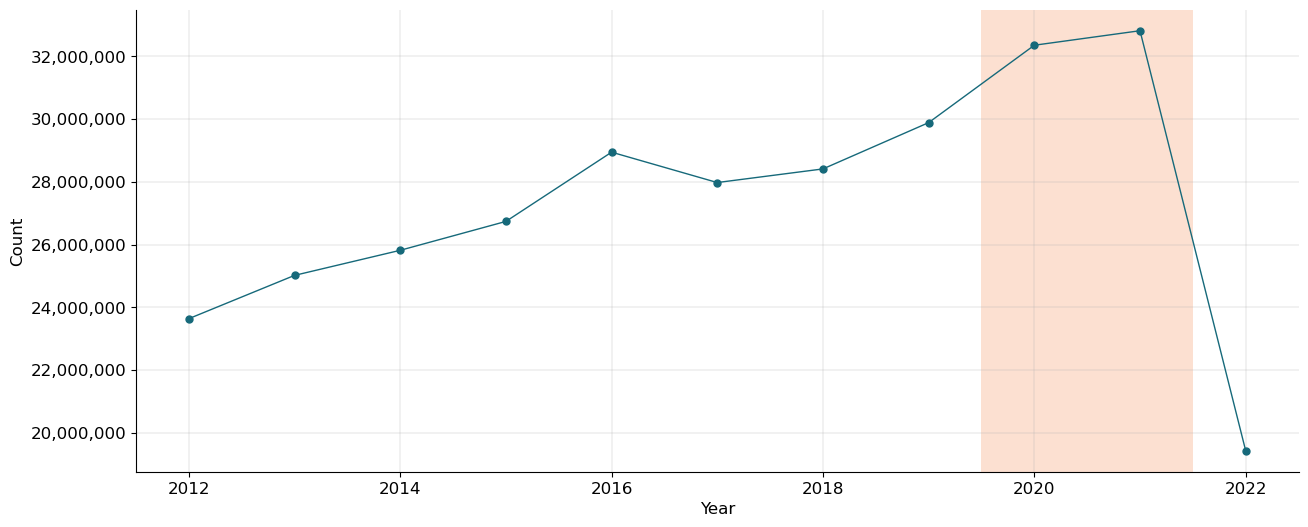

In [41]:
# figure size
fig, ax = plt.subplots(figsize=(15, 6))

# plot line
ax.plot(trend['year'].tolist(),
        trend['sum(work)'].tolist(),
        marker='o',
        markersize=5,
        color='#16697a',
        linestyle='-',
        linewidth=1,
        label='Published Works')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(2019.5, 2021.5, facecolor='#f26419', alpha=0.2)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 4. Number of Registered Publications from 2012 to 2022.</b><br>
        <i>Trend over the years of number of works published.</i>
    </p>
</div>

---

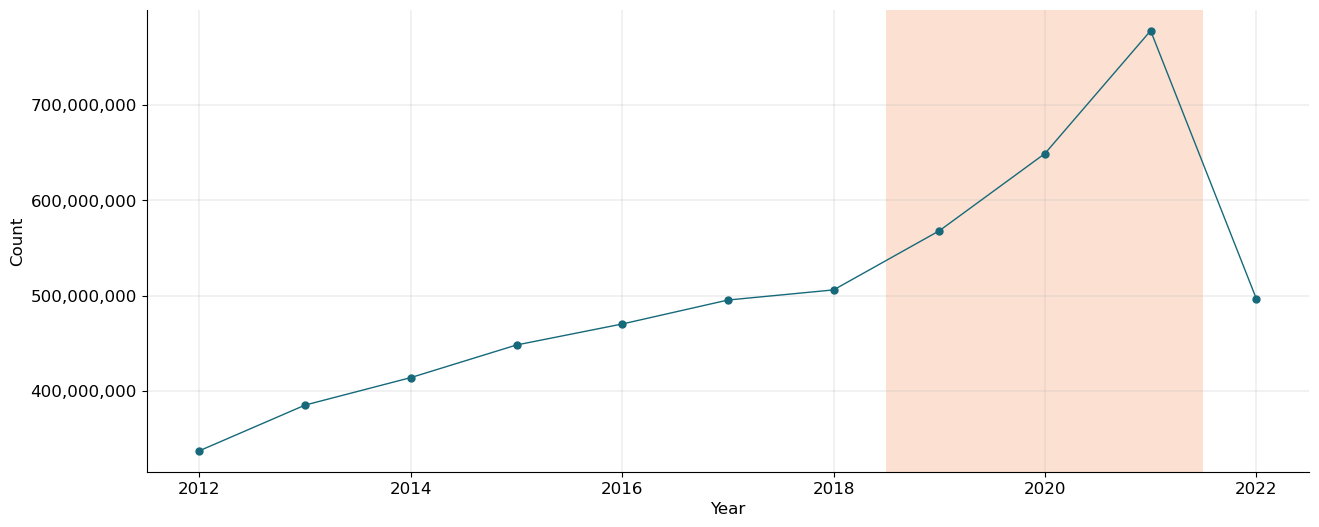

In [42]:
# figure size
fig, ax = plt.subplots(figsize=(15, 6))

# plot line
ax.plot(trend['year'].tolist(),
        trend['sum(cite)'].tolist(),
        marker='o',
        markersize=5,
        color='#16697a',
        linestyle='-',
        linewidth=1,
        label='Citations')

# format chart
formatter = tick.FuncFormatter(lambda x, p: format(int(x), ','))
ax.yaxis.set_major_formatter(formatter)
ax.axvspan(2018.5, 2021.5, facecolor='#f26419', alpha=0.2)
ax.spines[['right', 'top']].set_visible(False)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

# label
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# show plot
plt.grid(True, linewidth=0.25)
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 5. Number of Registered Citations from 2012 to 2022.</b><br>
        <i>Trend over the years of number of works cited.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Authors</i></span>

From Figure 6, **<span style='background:#dcf7f3'>the top 4 authors with the most publications associated with them are all from the United States</span>**, followed by researchers from China (except one from India). Charles Parker Thomas is the top author with the most publications from the United States, with research mostly related to Computer Science. Xin Li leads researchers from China, with publications related to Physics and Engineering. India’s Ashok Kumar has Computer Science-related studies. As seen in Figure 7, on the other hand, **<span style='background:#dcf7f3'>researchers from China dominated the top authors associated with the greatest number of citations</span>**. Xin Li leads this category. George Davey Smith from Great Britain has studies mostly related to Internal Medicine, while Panos Pardalos from the United States has research mostly related to Applied Optimization.

Figure 8 shows the number of authors’ social media and/or relational databases accounts. MAG and `OpenAlex` have the same figure as, when launched in 2022, the latter is supposed to be a replacement for the former, hence, account credentials may just be transferred from one database to another.

From Figures 6 and 7, we can infer that the authors with the most publications and citations are affiliated with the most research-intensive countries such as the United States and China. We can further infer that disciplines related to the physical and computer sciences are trending for research studies. We can validate these inferences thru the succeeding items of the report.

Figure 8 may have shown the data limitation of the study, where authors may have duplicate accounts in a database or social media.

In [43]:
most_work = pd.read_csv('processed_full/top100_work_count.csv')
most_work = most_work.sort_values('works_count', ascending=True)
# most_work

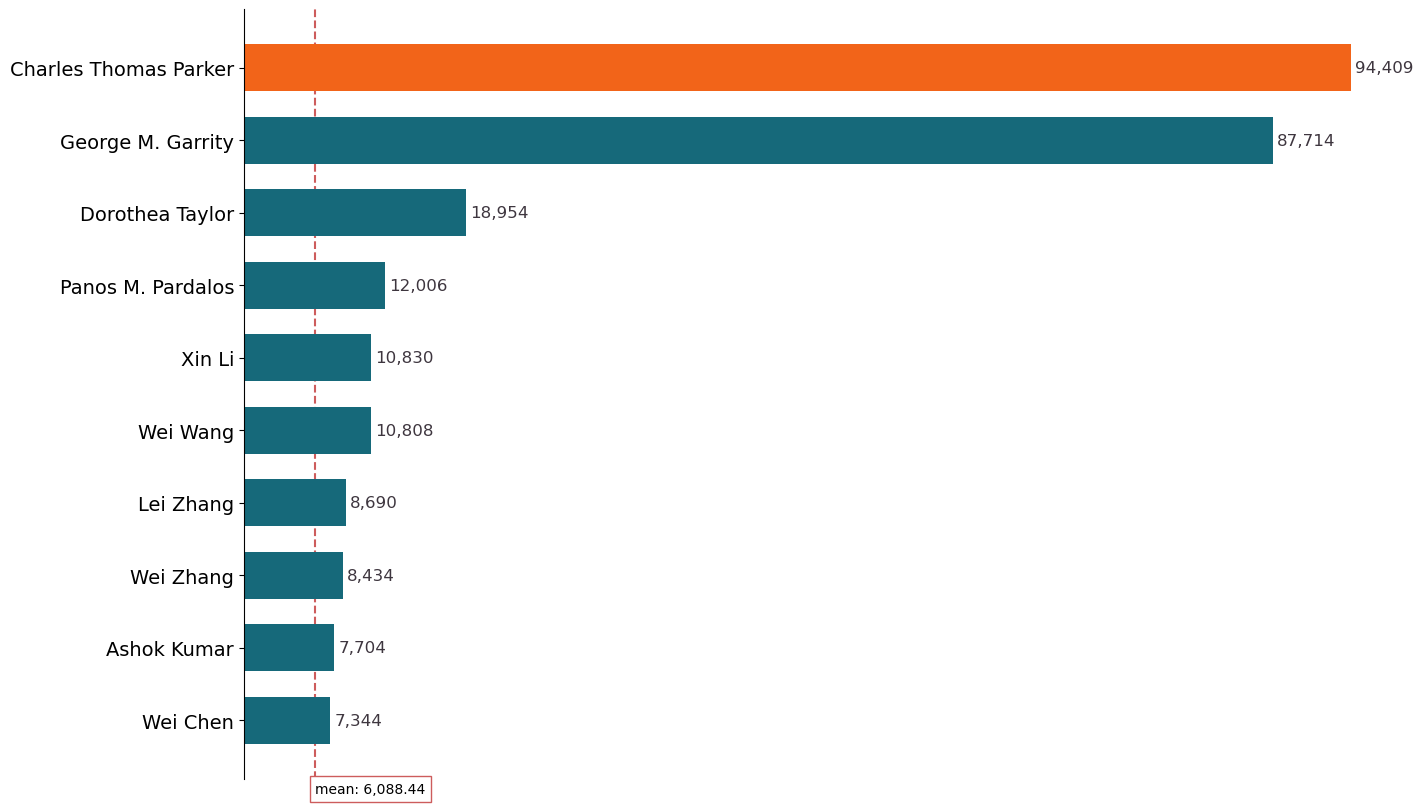

In [44]:
# calculating mean
mean_work = most_work['works_count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#16697a'] * len(most_work)
max_idx = most_work['works_count'].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
works = plt.barh(most_work['display_name'][-10:],
                 most_work['works_count'][-10:],
                 height=0.65,
                 color=bar_colors[-10:])

# chart formatting and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(works,
             labels=[f'{x:,.0f}' for x in most_work['works_count'][-10:]],
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=mean_work,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=mean_work,
        y=-1.0,
        s=f'mean: {mean_work:,.2f}',
        ha='left', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='indianred', ls='-'))
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 6. Top 10 Authors with the Most Number of Work Publications.</b><br>
        <i>Authors with the most number of OpenAlex registered published works.</i>
    </p>
</div>

---

In [45]:
most_cited = pd.read_csv('processed_full/top100_work_count.csv')
most_cited = most_cited.sort_values('cited_by_count', ascending=True)
# most_cited['country_code'][-10:].tolist()

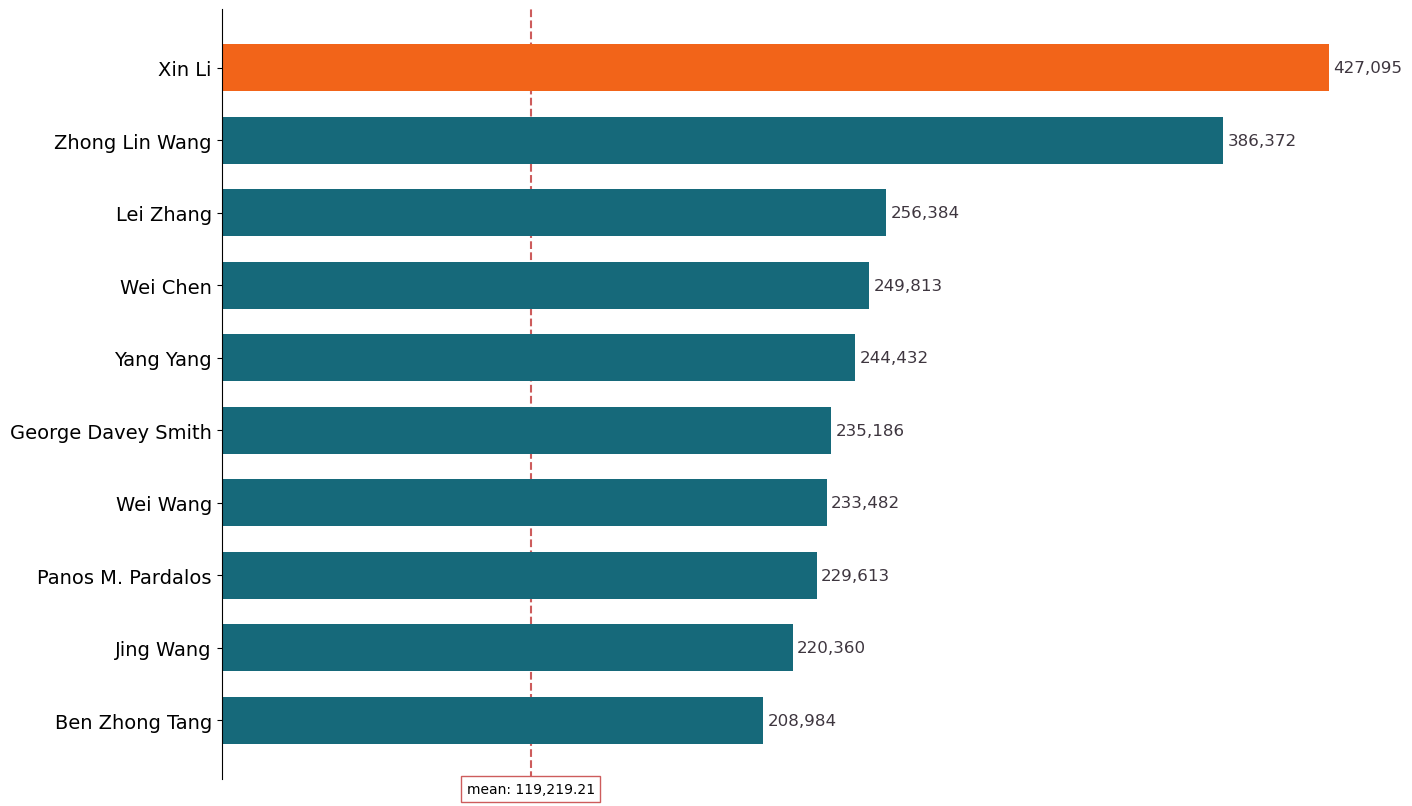

In [46]:
# calculate mean
mean_cites = most_cited['cited_by_count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#16697a'] * len(most_cited)
max_idx = most_cited['cited_by_count'].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
cites = plt.barh(most_cited['display_name'][-10:],
                 most_cited['cited_by_count'][-10:],
                 height=0.65,
                 color=bar_colors[-10:])

# chart format and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(cites,
             labels=[f'{x:,.0f}' for x in most_cited['cited_by_count'][-10:]],
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=mean_cites,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=mean_cites,
        y=-1.0,
        s=f'mean: {mean_cites:,.2f}',
        ha='center', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='indianred', ls='-'))
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 7. Top 10 Authors with the Most Work Citations.</b><br>
        <i>Authors with the most number of OpenAlex registered citations.</i>
    </p>
</div>

---

In [47]:
socmed = pd.read_csv('processed_full/soc_med_author.csv')
socmed = socmed.sort_values('Count', ascending=True)
# socmed

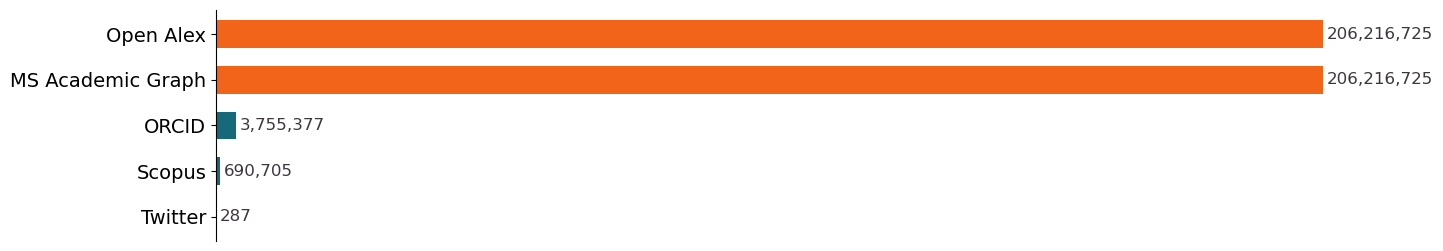

In [48]:
# figure size
fig, ax = plt.subplots(figsize=(15, 3))

# determine the color for the bars
bar_colors = ['#f26419'] * len(socmed)
high_bars = socmed['Count'][2:]
# max_idx = top_covid['count'].argmax()
for i in range(min(len(high_bars), len(bar_colors))):
    bar_colors[i] = '#16697a'

# horizontal bar plot
accts = plt.barh(socmed['Social Media'],
                 socmed['Count'],
                 height=0.6,
                 color=bar_colors[-10:])

# axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(accts,
             labels=[f'{x:,.0f}' for x in socmed['Count']],
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 8. Number of Social Media and Repository Accounts.</b><br>
        <i>Number of accounts (associated primarily to authors) per social media and/or relational database accounts.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Countries</i></span>

Figures 9, 10, 11, and 12 show that **<span style='background:#dcf7f3'>the United States of America dominates the numbers and density in terms of publications and of citations</span>**, followed by China. Other developed nations with strong academic research field are also included in the top countries with the most publications and citations such as Japan, Germany, and the United Kingdom.

Overall, **<span style='background:#dcf7f3'>it is evident from the list of countries with the greatest number of publications and citations are the developed nations</span>**. We can infer that developed nations are strongly associated with strong academic research fields.

In [49]:
# Load the dictionary from the file
with open('country_dict.pkl', 'rb') as file:
    country_dict = pickle.load(file)

with open('country_dict_df.pkl', 'rb') as file:
    country_dict_df = pickle.load(file)

In [50]:
top_countries_work = pd.read_csv('processed_full/'
                                 'top_countries_work_count.csv')
top_countries_work['country_name'] = (top_countries_work['country_code']
                                      .map(country_dict_df))
top_countries_work = top_countries_work.sort_values('works_count',
                                                    ascending=True)
# top_countries_work

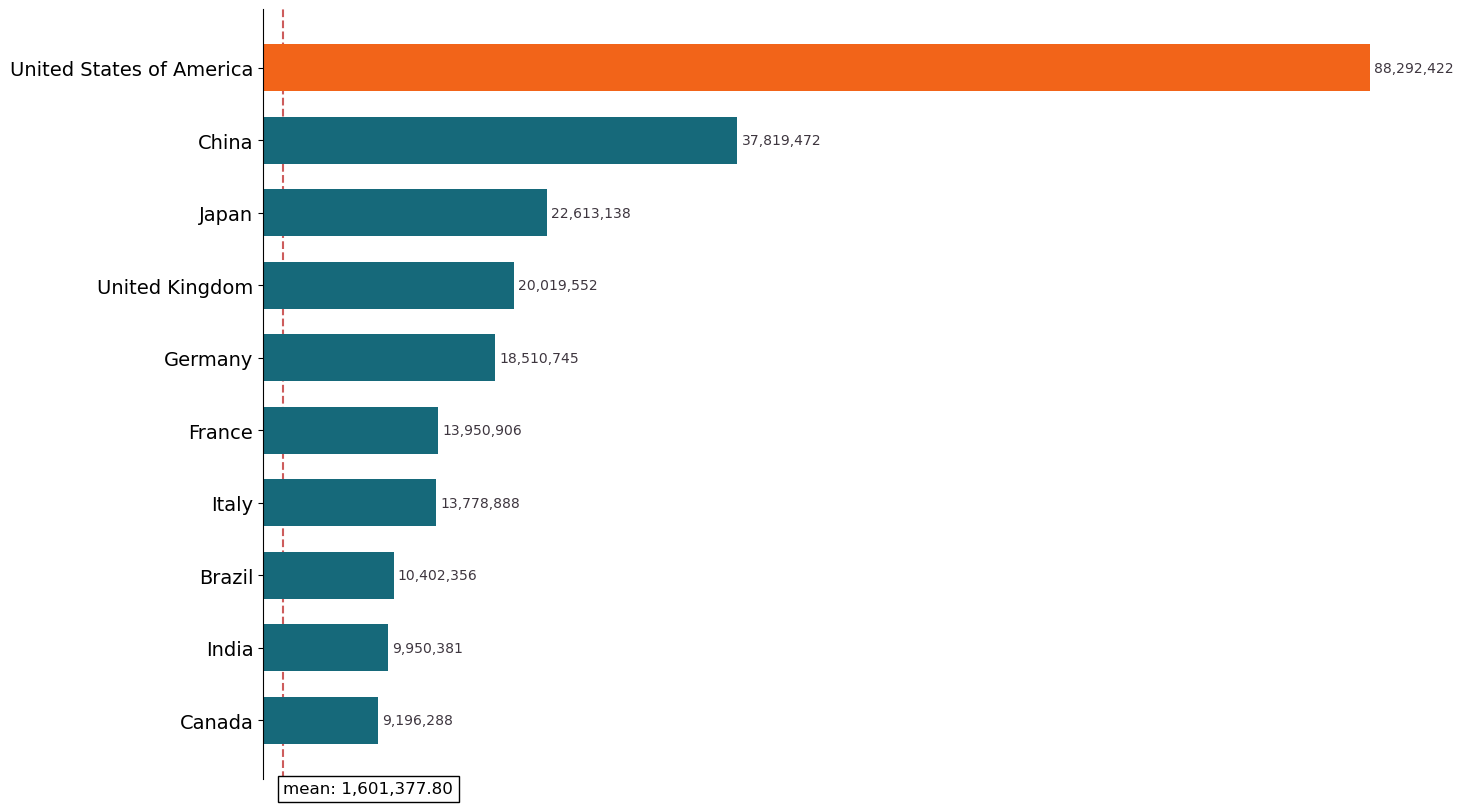

In [51]:
# calculate mean
mean_countries_work = top_countries_work['works_count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#16697a'] * len(top_countries_work)
max_idx = top_countries_work['works_count'].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
countries_work = plt.barh(top_countries_work['country_name'][-10:],
                          top_countries_work['works_count'][-10:],
                          height=0.65,
                          color=bar_colors[-10:])


# format chart and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(countries_work,
             labels=([f'{x:,.0f}' for x 
                      in top_countries_work['works_count'][-10:]]),
             padding=3,
             color='#3e363f', 
             fontsize=10,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=mean_countries_work,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=mean_countries_work,
        y=-1.0,
        s=f'mean: {mean_countries_work:,.2f}',
        ha='left', 
        fontsize=12,
        bbox=dict(facecolor='white', edgecolor='black', ls='-'))
# ax.set_title('Top 10 Countries with the Most Published Works', fontsize=16,
#               fontweight='bold', pad=20)
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 9. Top 10 Countries Associated with the Most Work Publications.</b><br>
        <i>Number of published works associated to the authors from the listed countries.</i>
    </p>
</div>

---

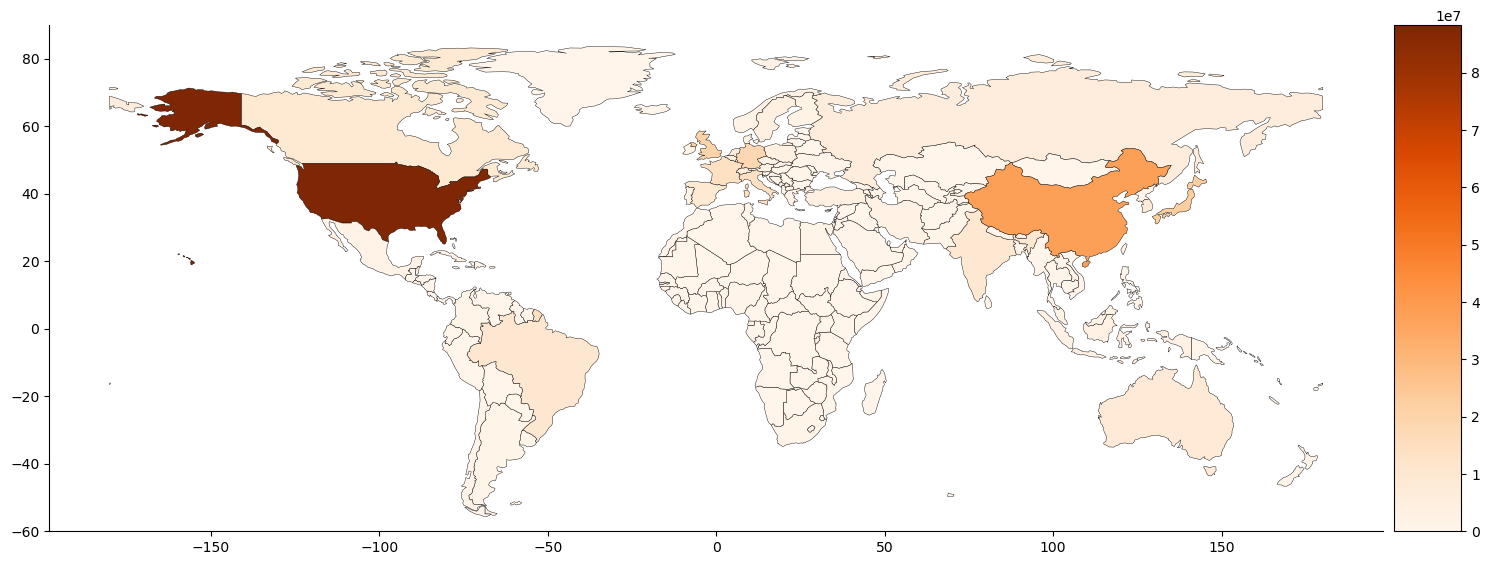

In [52]:
# load the world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# define the countries to highlight and their respective weights
country_count = (top_countries_work[['country_code','works_count']]
                 .sort_values('works_count',
                              ascending=False).values.tolist())

# create a new column 'highlight' with default value 0
world['highlight'] = 0

# set the 'highlight' value to the specified weight for the selected countries
for country, count in country_count:
    world.loc[world['name'] == country_dict.get(country), 'highlight'] = count

# plot the world map with highlighted countries
fig, ax = plt.subplots(figsize=(15, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(ax=ax,
           column='highlight',
           cmap='Oranges',
           linewidth=0.3, 
           edgecolor='black', 
           legend=True,
           cax=cax)

# set ocean color and style
ax.set_facecolor('white')

# format chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set the limits for the latitude axis to exclude the poles
ax.set_ylim(-60, 90)

# show the plot
plt.tight_layout()
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 10. Published Works-Country Density.</b><br>
        <i>Visualization of distribution of published works in the world.</i>
    </p>
</div>

---

In [53]:
top_countries_cited = pd.read_csv('processed_full/'
                                  'top_countries_cited_by_count.csv')
top_countries_cited['country_name'] = (top_countries_cited['country_code']
                                       .map(country_dict_df))
top_countries_cited = top_countries_cited.sort_values('cited_by_count',
                                                    ascending=True)
# top_countries_cited # -- some country code are not mapped accordingly, to recheck

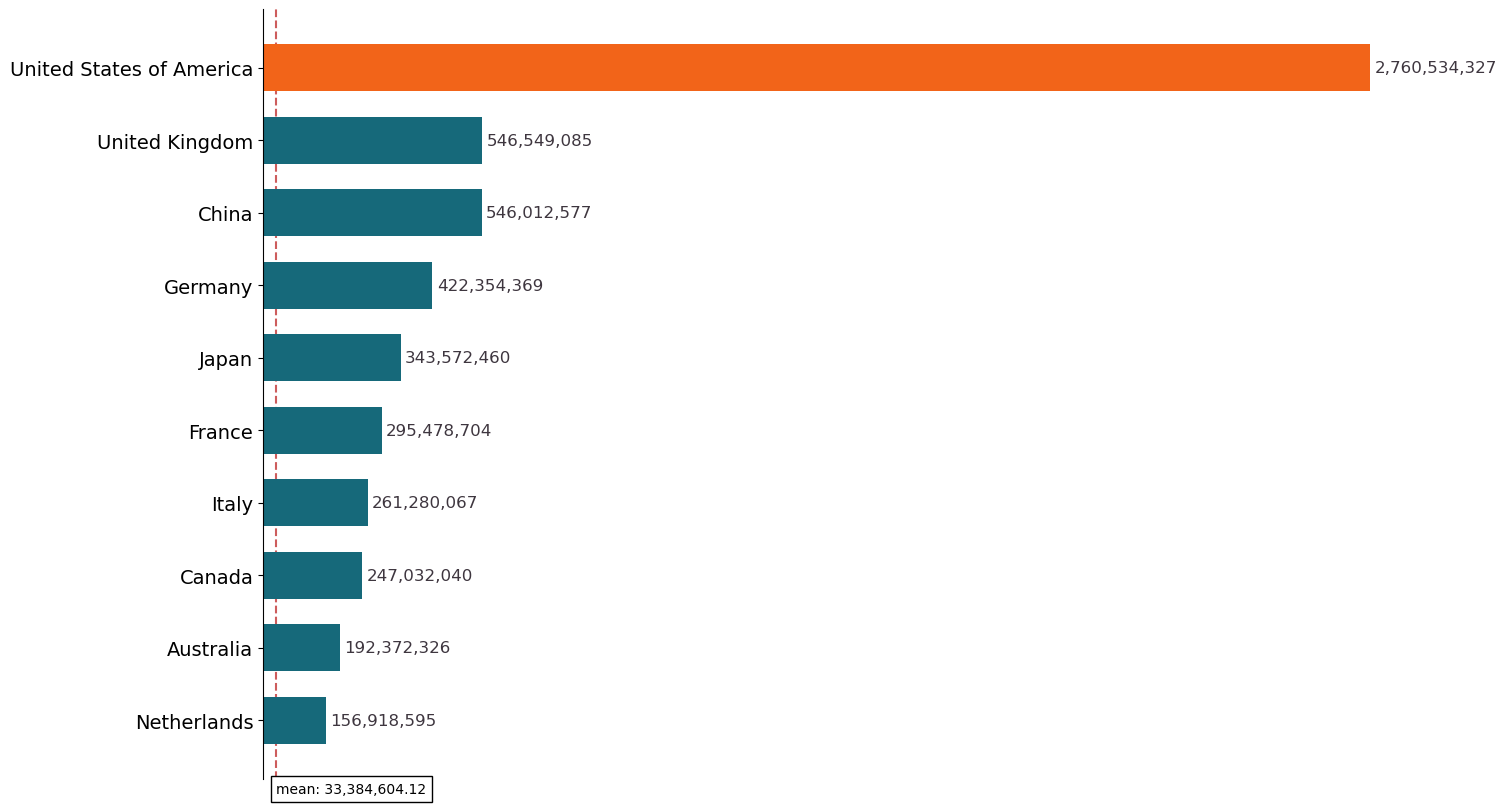

In [54]:
# calculate mean
mean_countries_cited = top_countries_cited['cited_by_count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#16697a'] * len(top_countries_cited)
max_idx = top_countries_cited['cited_by_count'].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
countries_cited = plt.barh(top_countries_cited['country_name'][-10:],
                           top_countries_cited['cited_by_count'][-10:],
                           height=0.65,
                           color=bar_colors[-10:])


# format chart and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(countries_cited,
             labels=([f'{x:,.0f}' for x in 
                      top_countries_cited['cited_by_count'][-10:]]),
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=mean_countries_cited,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=mean_countries_cited,
        y=-1.0,
        s=f'mean: {mean_countries_cited:,.2f}',
        ha='left', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', ls='-'))
# ax.set_title('Top 10 Countries with the Most Citations', fontsize=16,
#               fontweight='bold', pad=20)
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 11. Top 10 Countries Associated with the Most Work Citations.</b><br>
        <i>Number of citations associated to the authors from the listed countries.</i>
    </p>
</div>

---

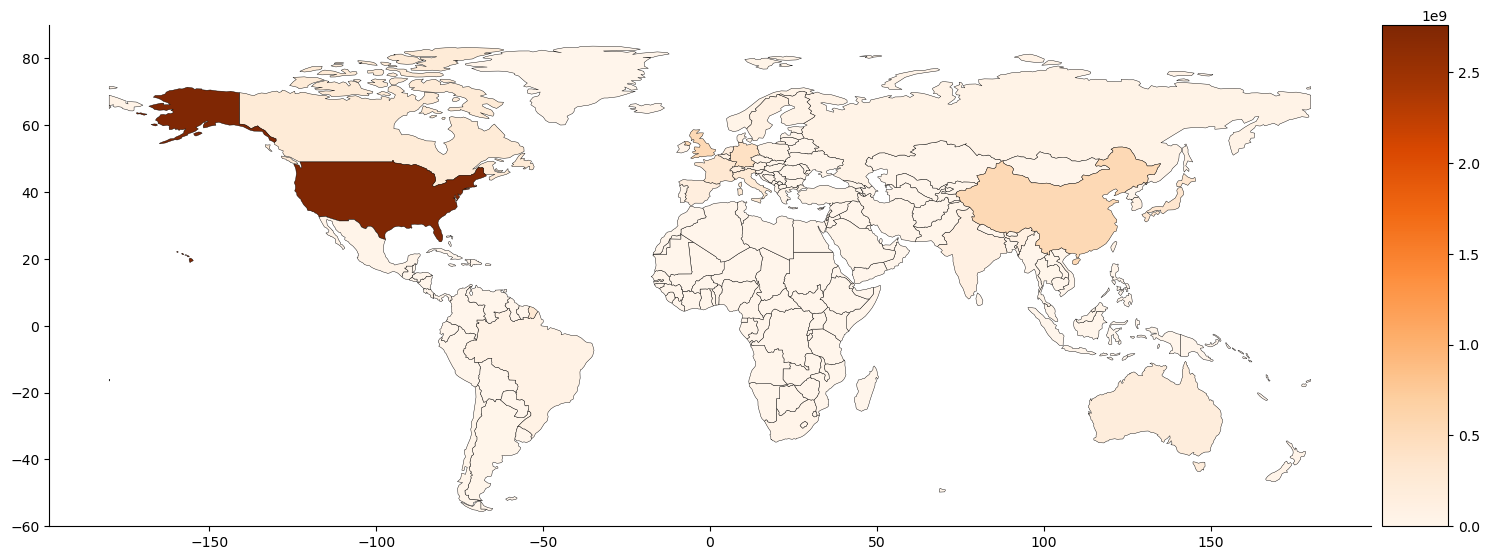

In [55]:
# load the world shapefile data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# define the countries to highlight and their respective weights
country_count = (top_countries_cited[['country_code', 'cited_by_count']]
                 .sort_values('cited_by_count',
                              ascending=False).values.tolist())

# create a new column 'highlight' with default value 0
world['highlight'] = 0

# set the 'highlight' value to the specified weight for the selected countries
for country, count in country_count:
    world.loc[world['name'] == country_dict.get(country), 'highlight'] = count

# plot the world map with highlighted countries
fig, ax = plt.subplots(figsize=(15, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(ax=ax,
           column='highlight',
           cmap='Oranges',
           linewidth=0.3, 
           edgecolor='black', 
           legend=True,
           cax=cax)

# set ocean color and style
ax.set_facecolor('white')

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set the limits for the latitude axis to exclude the poles
ax.set_ylim(-60, 90)

# show plot
plt.tight_layout()
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 12. Citations-Country Density.</b><br>
        <i>Visualization of distribution of citations in the world.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Institutions</i></span>

Figure 13 solidifies the evidence of **<span style='background:#dcf7f3'>developed countries relate to a strong academic research field</span>**, with institutions from the United States such as the University of Michigan-Ann Arbor, University of Washington, and Harvard University leading the number of combined publications and citations associated with these institution. Institutions from China also are dominating this list.

University of Sao Paolo in Brazil leads in terms of the number of publications (Figure 14) while Harvard University in the United States leads in terms of the number of citations (Figure 15). These are quite expected as these two universities are some of the most prominent institutions in the world, with the latter ranking among the three best universities annually. Harvard University has established itself as the most competent institution in terms of research, thanks to its pool of research-oriented academics.

In [56]:
top_institutions = pd.read_csv('processed_full/top_institution.csv')
top_institutions = top_institutions.sort_values('count', ascending=True)
# top_institutions

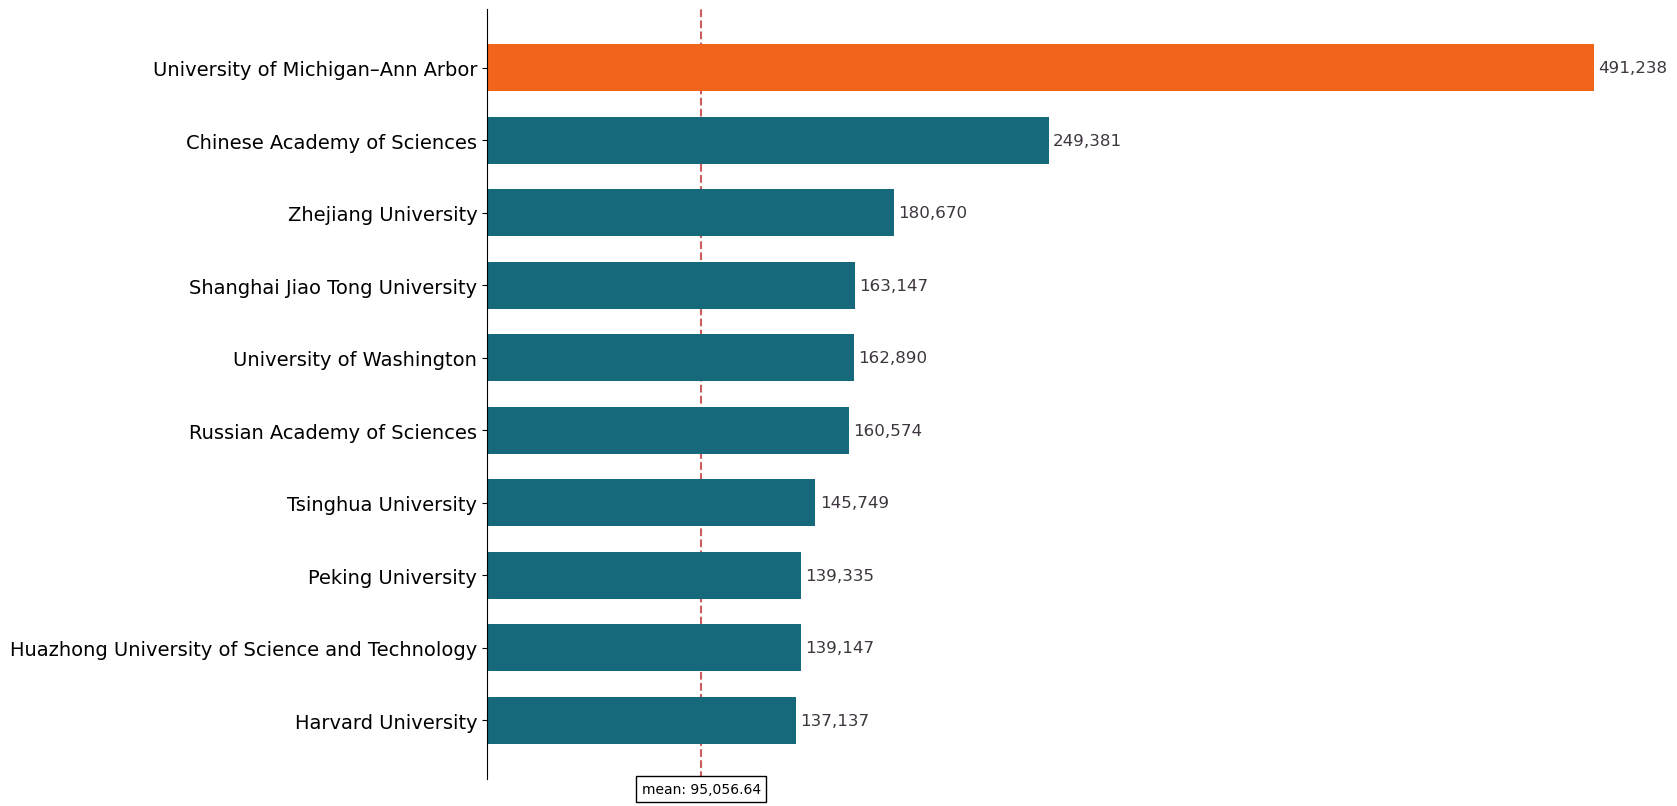

In [57]:
# calculate mean
top_insti_mean = top_institutions['count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#16697a'] * len(top_institutions)
max_idx = top_institutions['count'].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
insti_top = plt.barh(top_institutions['display_name'][-10:],
                     top_institutions['count'][-10:],
                     height=0.65,
                     color=bar_colors[-10:])


# axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(insti_top,
             labels=[f'{x:,.0f}' for x in top_institutions['count'][-10:]],
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=top_insti_mean,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=top_insti_mean,
        y=-1.0,
        s=f'mean: {top_insti_mean :,.2f}',
        ha='center', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', ls='-'))

# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 13. Top 10 Institutions with the Most Number of Publications and Citations.</b><br>
        <i>Institutions associated with authors who have the most combined number of publications and citations.</i>
    </p>
</div>

---

In [58]:
top_work_insti = pd.read_csv('processed_full/'
                             'top_insti_country_work_by_count_20count.csv')
top_work_insti['country_name'] = (top_work_insti['country_code']
                                  .map(country_dict_df))
top_work_insti = top_work_insti.sort_values('works_count',
                                            ascending=True)
# top_work_insti

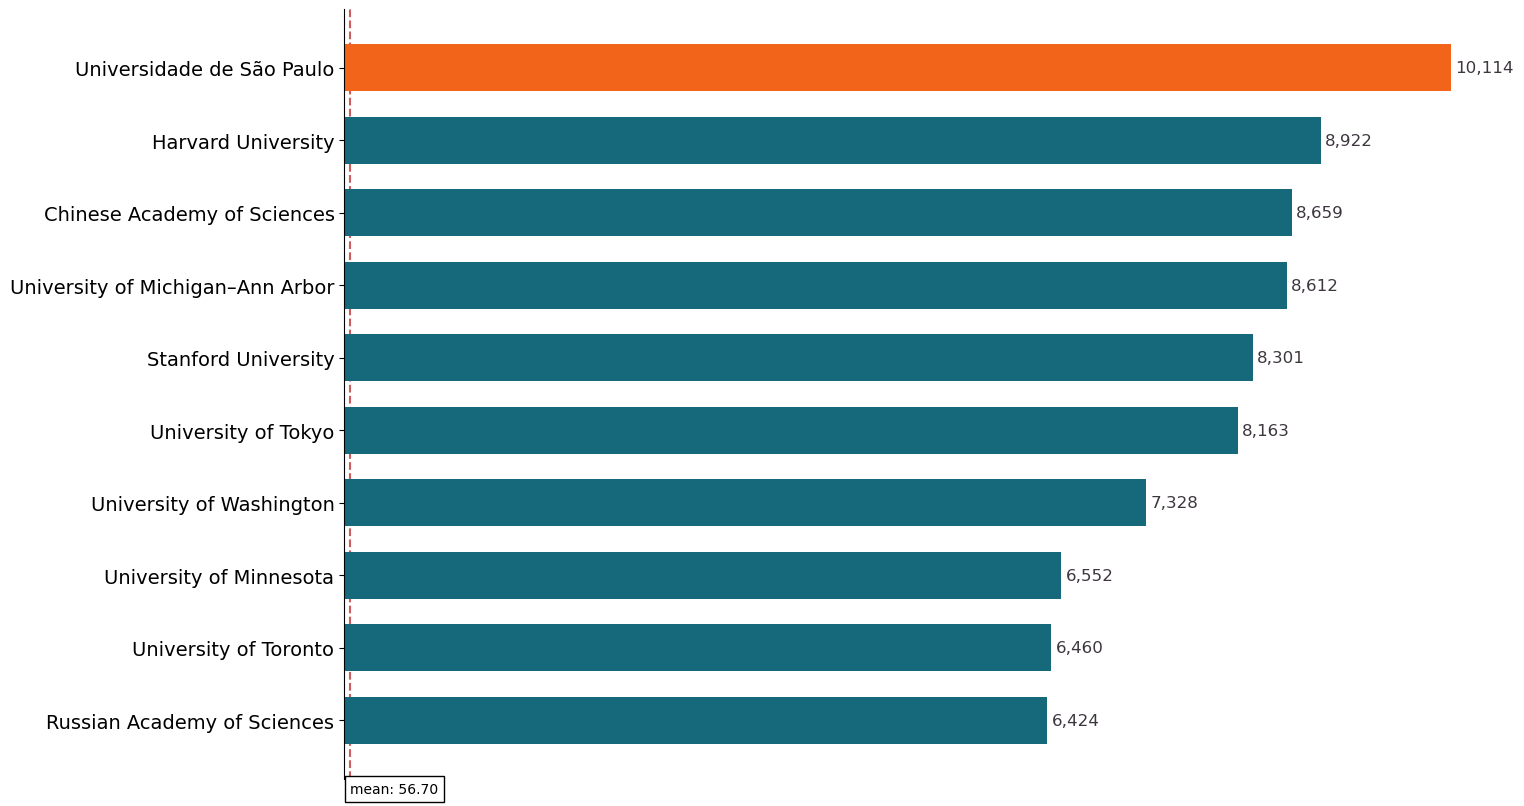

In [59]:
# calculate mean
mean_insti_work = top_work_insti['works_count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#16697a'] * len(top_work_insti)
max_idx = top_work_insti['works_count'].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
insti_work = plt.barh(top_work_insti['display_name'][-10:],
                      top_work_insti['works_count'][-10:],
                      height=0.65,
                      color=bar_colors[-10:])


# format chart and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(insti_work,
             labels=([f'{x:,.0f}' for x 
                      in top_work_insti['works_count'][-10:]]),
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=mean_insti_work,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=mean_insti_work,
        y=-1.0,
        s=f'mean: {mean_insti_work:,.2f}',
        ha='left', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', ls='-'))
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 14. Top 10 Institutions with the Most Number of Publications.</b><br>
        <i>Institutions associated with authors who have the most number of publications.</i>
    </p>
</div>

---

In [60]:
top_cited_insti = pd.read_csv('processed_full/'
                              'top_insti_country_cited_by_count_100count.csv')
top_cited_insti['country_name'] = (top_cited_insti['country_code']
                                   .map(country_dict_df))
top_cited_insti = top_cited_insti.sort_values('cited_by_count',
                                             ascending=True)
# top_cited_insti

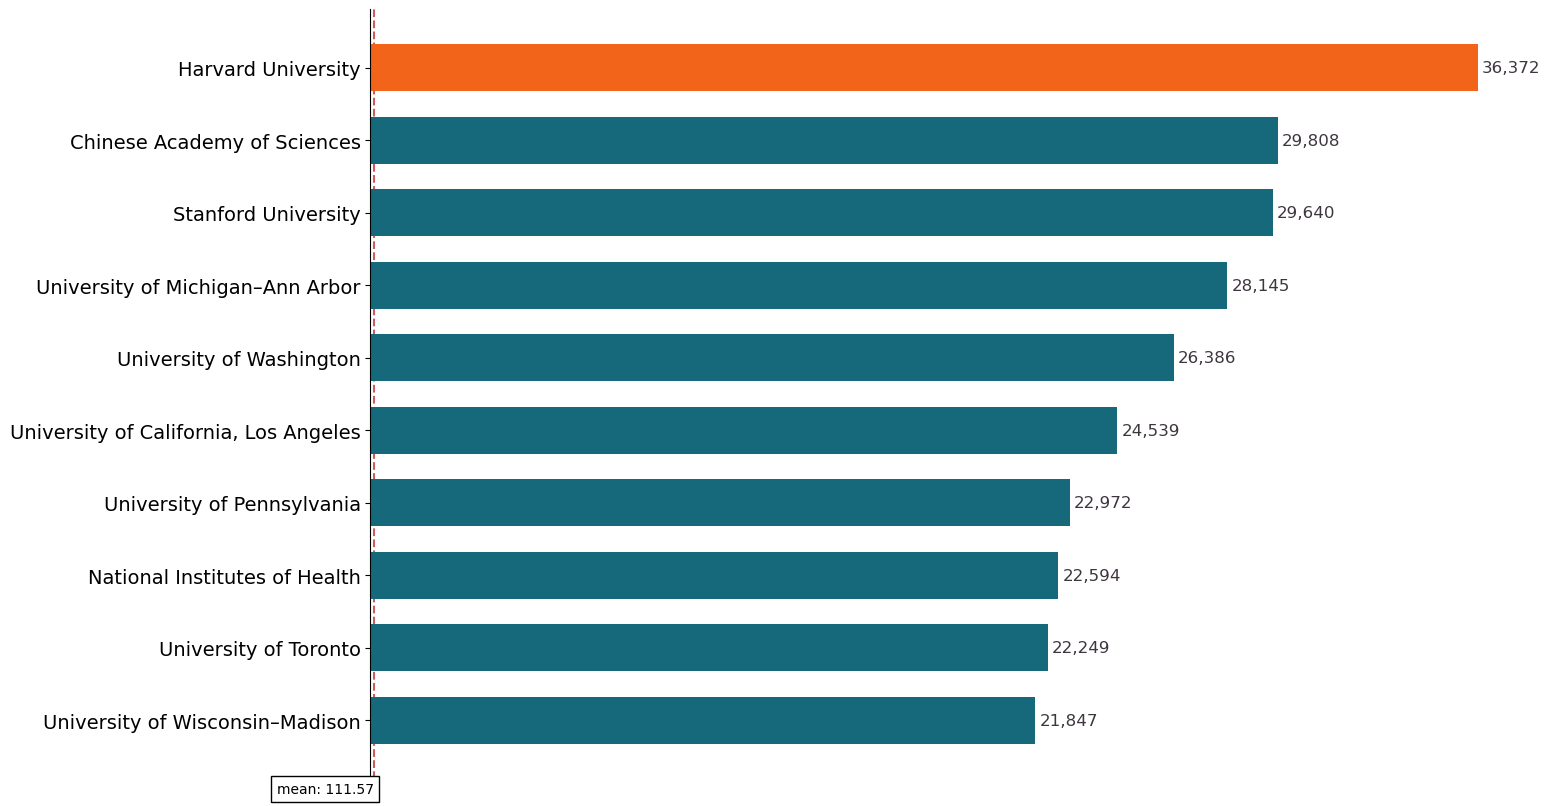

In [61]:
# calculate mean
mean_insti_cite = top_cited_insti['cited_by_count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#16697a'] * len(top_cited_insti)
max_idx = top_cited_insti['cited_by_count'].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
insti_cite = plt.barh(top_cited_insti['display_name'][-10:],
                      top_cited_insti['cited_by_count'][-10:],
                      height=0.65,
                      color=bar_colors[-10:])


# axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(insti_cite,
             labels=([f'{x:,.0f}' for x in 
                      top_cited_insti['cited_by_count'][-10:]]),
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=mean_insti_cite,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=mean_insti_cite,
        y=-1.0,
        s=f'mean: {mean_insti_cite:,.2f}',
        ha='right', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', ls='-'))
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 15. Top 10 Institutions with the Most Number of Citations.</b><br>
        <i>Institutions associated with authors who have the most number of citations.</i>
    </p>
</div>

<span style="color:#f26419; font-size:18px"><i>Specific Disciplines & Special Topics</i></span>

**<span style='background:#dcf7f3'>Disciplines of science, engineering, and medicine dominate the concepts of publications and citations</span>**, shown in Figure 16. These are the key research areas with which researchers can focus should the objective be to expand the knowledge base for these areas. Other key areas falling under the mean number of publications and citations combined may be explored by researchers if they are to seek more novel research outcomes.

In [62]:
top_disciplines = pd.read_csv('processed_full/top_100_topics.csv')
top_disciplines = top_disciplines.sort_values('count',
                                              ascending=True)
# top_disciplines

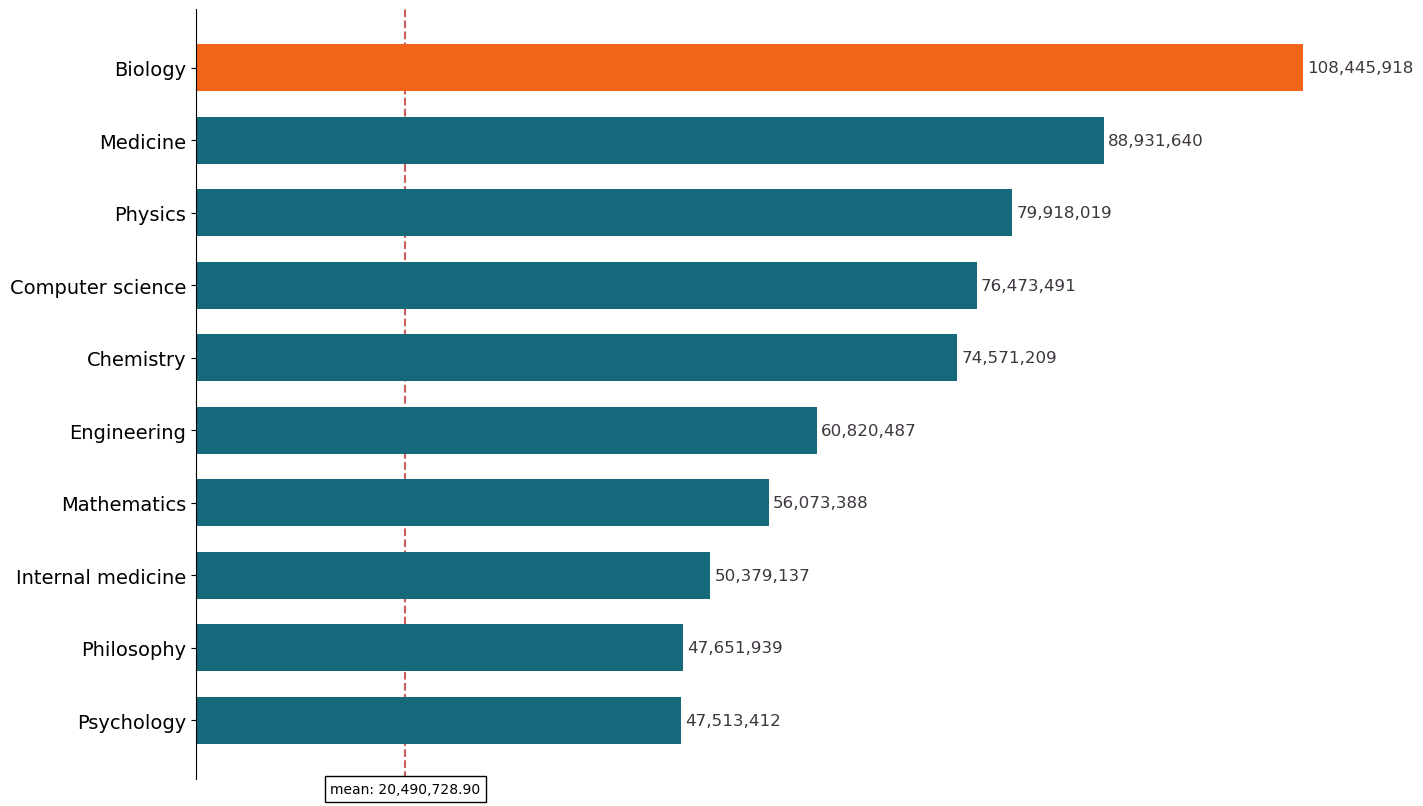

In [63]:
# calculate mean
mean_top_disc = top_disciplines['count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 10))

# determine the color for the bars
bar_colors = ['#16697a'] * len(top_disciplines)
max_idx = top_disciplines['count'].argmax()
bar_colors[max_idx] = '#f26419'

# horizontal bar plot
disc = plt.barh(top_disciplines['concept_display_name'][-10:],
                top_disciplines['count'][-10:],
                height=0.65,
                color=bar_colors[-10:])

# axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(disc,
             labels=([f'{x:,.0f}' for x in 
                      top_disciplines['count'][-10:]]),
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=mean_top_disc,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=mean_top_disc,
        y=-1.0,
        s=f'mean: {mean_top_disc:,.2f}',
        ha='center', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', ls='-'))
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 16. Top 10 Disciplines with the Most Combined Number of Publications and Citations.</b><br>
        <i>Disciplines associated with authors who have the most combined number of publications and citations.</i>
    </p>
</div>

---

Since there is a surge in terms of number of publications and citations during the pandemic period, the project peaked in the institutions that are mostly associated with COVID-19 research. Top institutions include Harvard University and Centers for Disease Control and Prevention (see Figure 17), which could mean that during such time, **<span style='background:#dcf7f3'>several relevant research was being published regarding the disease to come up with viable cures and preventive measures</span>** (e.g., effective vaccine or medicine).

In [64]:
top_school_lvl4_5 = pd.read_csv('processed_full/'
                                'top_schools_for_topics_level4and5.csv')
top_covid = (top_school_lvl4_5[top_school_lvl4_5['concept_display_name']
                               == 'Coronavirus disease 2019 (COVID-19)'])
top_covid = top_covid.sort_values('count', ascending=True)
# top_covid

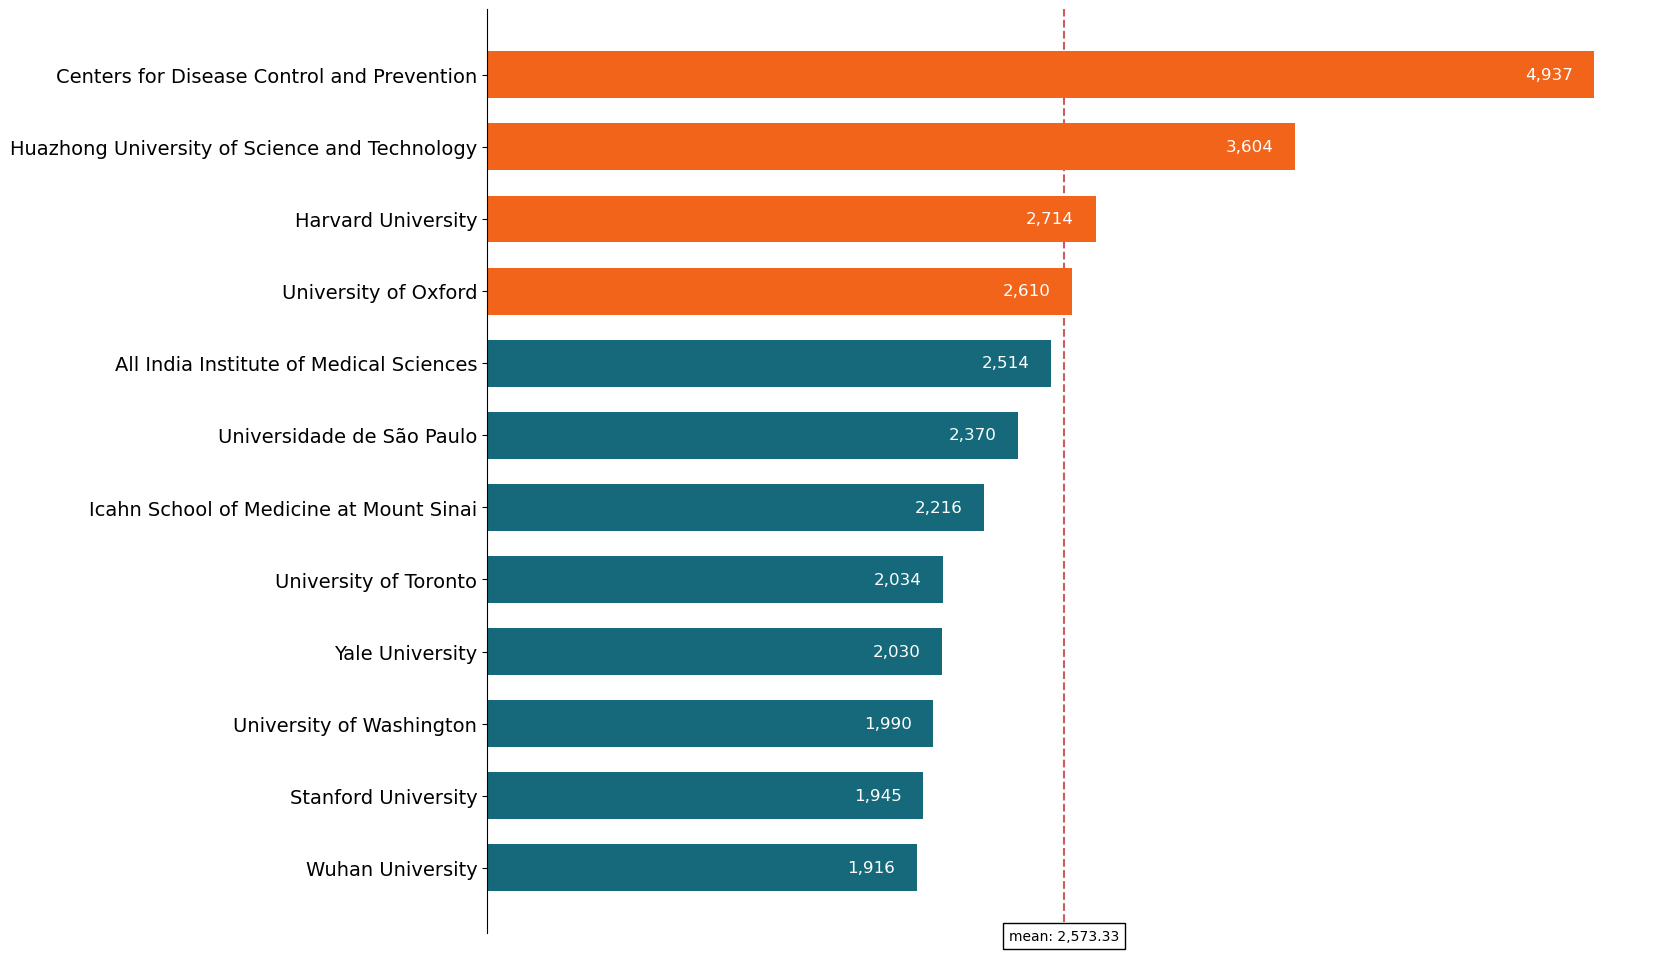

In [65]:
# calculate mean
mean_covid = top_covid['count'].mean()

# figure size
fig, ax = plt.subplots(figsize=(15, 12))

# determine the color for the bars
bar_colors = ['#f26419'] * len(top_covid)
high_bars = top_covid['count'][4:]
for i in range(min(len(high_bars), len(bar_colors))):
    bar_colors[i] = '#16697a'

# horizontal bar plot
covid = plt.barh(top_covid['display_name'],
                 top_covid['count'],
                 height=0.65,
                 color=bar_colors)

# axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(covid,
             labels=[f'{x:,.0f}' for x in top_covid['count']],
             padding=-50,
             color='white', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
ax.axvline(x=mean_covid,
           zorder=0,
           color='indianred',
           ls='--',
           lw=1.5)
ax.text(x=mean_covid,
        y=-1.0,
        s=f'mean: {mean_covid:,.2f}',
        ha='center', 
        fontsize=10,
        bbox=dict(facecolor='white', edgecolor='black', ls='-'))

# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 17. Top Institutions on COVID-19 Research.</b><br>
        <i>Institutions associated with authors who have the most combined number of publications and citations related to COVID-19 Research.</i>
    </p>
</div>

---

Lastly, we zeroed in on the data science-related topics and the number of publications and citations associated with the special topic (see Figure 18). While computer science is one of the key research areas, **<span style='background:#dcf7f3'>data science only amounts to less than 1% of the total works</span>**, published and cited.

In [66]:
ds = pd.read_csv('processed_full/data_science.csv')
ds = ds.sort_values('count', ascending=True)
# ds

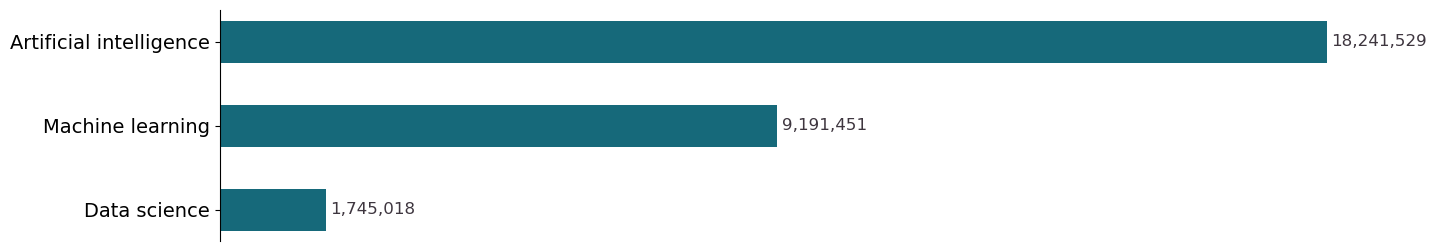

In [67]:
# figure size
fig, ax = plt.subplots(figsize=(15, 3))

# horizontal bar plot
data_science = plt.barh(ds['concept_display_name'][-3:],
                 ds['count'][-3:],
                 height=0.5,
                 color='#16697a')

# format chart and axis labels
ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
formatter = tick.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.bar_label(data_science,
             labels=([f'{x:,.0f}' for x in 
                      ds['count'][-3:]]),
             padding=3,
             color='#3e363f', 
             fontsize=12,
             label_type='edge',
             fontweight='regular')
ax.yaxis.set_tick_params(labelsize=14)
 
# show plot
plt.show()

<div>
    <p style="font-size:10px;font-style:default;text-align:center">
        <b>Figure 18. Data Science-Related Publications and Citations.</b><br>
        <i>Combined number of publications and citations related to data science.</i>
    </p>
</div>

In [68]:
ds_percent = pd.read_csv('processed_full/data_science_percentage.csv')
print(f'% of Data Science-Related Publications and Citations: '
      f'{(ds_percent.loc[0, "Data Science %"]):.5f}%')

% of Data Science-Related Publications and Citations: 0.83064%


<div style="background-color:#3e363f; color:#FFFFFF; padding: 1px;"> </div>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">Conclusion</h1>

<span style="color:#f26419; font-size:18px"><i>OpenAlex</i></span>

The study shows that there has been a surge in the number of publications and citations during the pandemic period, with disciplines related to science, engineering, and medicine as the prominent research areas. Developed countries such as the United States, China, Japan, Germany, and the United Kingdom dominate the list of countries with the most publications and citations, and institutions from these countries also lead in terms of combined publications and citations. **<span style='background:#dcf7f3'>The authors with the most publications and citations are affiliated with the most research-intensive countries such as the United States and China.</span>** However, data science-related topics only amount to less than 1% of the total works published and cited. The study also highlights the limitations of using social media and/or relational databases in identifying authors due to the possibility of duplicate accounts.

The analysis of the dataset revealed a diverse range of authors contributing to various fields of research. **<span style='background:#dcf7f3'>The spike in research papers during the pandemic was expected, given the priority of finding a cure for COVID-19.</span>** However, it is important to note that the accuracy of the author count should be considered an estimate due to the presence of duplicate authors.

Overall, nonetheless, we have gained ample insights with analyzing just one of the five dataset types of `OpenAlex` repository. Through the analysis of the `OpenAlex Authors` dataset, we have obtained the insights that hold immense potential for maximizing the impact of scholarly publishing to the academic research field and in society in general. These insights also provide information and foundation to make informed decisions, refine strategies, and drive innovation in the realm of scholastics and academe.

<span style="color:#f26419; font-size:18px"><i>Big Data</i></span>

From a technical perspective, converting the data to the `Parquet` file format is highly recommended for processing medium to large datasets in `Apache` or similar environments. Despite the reduced readability and limited universal support, `Parquet` offers several advantages, such as columnar storage for faster processing, efficient space utilization through compression, and schema evolution capabilities.

In practice, the `ETL` [8] process involves additional steps such as data enrichment, feature engineering, aggregation, data quality checks, applying security measures like data masking, optimization, and addressing specific use case requirements. `Spark` is a reliable tool for processing massive datasets, and its scalability depends on the available resources.

During the analysis, we encountered some limitations such as kernel failures and connection issues. However, these challenges served as valuable learning experiences for building efficient pipelines. Our approach, involving parallel work on extraction and report generation while collaborating on the analysis, proved successful for our SLT.

In conclusion, leveraging big data processing for analytics provides significant advantages in terms of scalability, performance, and flexibility. By utilizing technologies such as `Apache Spark` and adopting file formats like `Parquet`, we can efficiently process large datasets, enabling faster and more accurate insights, which, when uncovered, can provide the competitive edge needed in today's data-driven landscapes, such as the academic community.

<div style="background-color:#3e363f; color:#FFFFFF; padding: 1px;"> </div>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">Recommendations</h1>

Based on the analysis, there are several recommendations to consider:

1. **Consider other `OpenAlex` dataset types.** Since the team processed only one type of `OpenAlex` dataset, which is the `Author`, this project was limited with the data considered in the study. There may be features from other dataset types that may be helpful in gaining more insights in the academic research and scholarly publishing landscape. Combining the `Authors` dataset to `Works`, `Concepts` and other full datasets available in the API may map the works to the authors more accurately. This will provide more accurate insights into individual author contributions.
2. **Consider a quantitative analysis.** Continuing researchers of this project may look into using the `scores` data under the `x_concepts` feature in conjunction with `summary_stats`'s objects, which measures the citation impact factor and can definitely give better insights to the impact of the authors works to their key research area, the academe, and the society in general.
3. **Handle duplicates.** Handling duplicates should be given top priority as it significantly improves data quality. In order to address this issue, it is recommended to reach out to the `OpenAlex` team for guidance and support. By collaborating with them, we can ensure that the dataset is cleansed of duplicates, leading to more accurate and reliable analyses. 
4. **Consider cluster analysis.** Further researchers may also look into exploring the association of authors to specific concepts and research topics. Clustering authors based on these specified concepts can provide further insights into the patterns and trends in their research. 
5. **Consider recommender system development.** Develop a recommender system that recommends authors or works based on their preference concept. This will help researchers find relevant research more quickly and efficiently.
6. **Big `data pipeline` and `batch processing`.** Implementing scheduled `batch processing` [9] in the big `data pipeline` [10], even on a monthly basis, is highly suitable for the `OpenAlex Author` dataset, especially considering that these reports are not of mission-critical nature. By adopting this approach, continuing researchers can efficiently handle the data processing tasks, ensuring regular updates while accommodating the non-time-sensitive nature of the reports. This allows for a balance between resource utilization and meeting the analytical requirements.
7. **Invest in more big data infrastructure.** In line with the above recommendation, increase in resource capacities may help with faster processing, avoiding any limitations that were encountered during the analysis in this particular project.

By implementing these recommendations, researchers and organizations can gain a better understanding of research trends, identify top contributors, and facilitate the discovery of new research ideas and collaborations.

<div style="background-color:#3e363f; color:#FFFFFF; padding: 1px;"> </div>

<h1 style="background-color:#16697a; color:#FFFFFF; padding: 20px;">References</h1>

[1] AWS. (n.d.). <i>Building a performance efficient data pipeline.</i> https://docs.aws.amazon.com/whitepapers/latest/aws-glue-best-practices-build-performant-data-pipeline/building-a-performance-efficient-data-pipeline.html

[2] Rallison, S. P. (2015, Jun 12). What are Journals for? <i> The Annals of the Royal College of Surgeons of England, 97(2).</i> https://doi.org/10.1308/003588414X14055925061397

[3] The Hong Kong University of Science and Technology. (n.d.). <i>OpenAlex Database of Papers, Authors, Institutions, and more.</i> https://library.hkust.edu.hk/sc/openalex/

[4] OpenAlex API Documentation. (n.d.). <i>Concept object.</i> https://docs.openalex.org/api-entities/concepts/concept-object#the-dehydratedconcept-object

[5] OpenAlex API Documentation. (n.d.). <i>Authors.</i> https://docs.openalex.org/api-entities/authors

[6] OpenAlex API Documentation. (n.d.). <i>Author object.</i> https://docs.openalex.org/api-entities/authors/author-object

[7] OpenAlex API Documentation. (n.d.). <i>FAQ.</i> https://docs.openalex.org/additional-help/faq

[8] AWS. (n.d.). <i>What is ETL (Extract Transform Load)?</i> https://aws.amazon.com/what-is/etl/

[9] Balasankula, H. (2022, Apr 18). Batch Processing vs. Stream Processing: 9 Critical Differences [blog post]. <i>Hevo Data.</i> https://hevodata.com/learn/batch-processing-vs-stream-processing/

[10] Okada, M. (2022, Sep 8). The Benefits of a Data Pipeline for Client Reporting [blog post]. <i>AgencyAnalytics.</i> https://agencyanalytics.com/blog/data-pipeline